In [1]:
load("Figure4CDEF.rdata")

In [2]:
library(ggplot2)

png 
  2

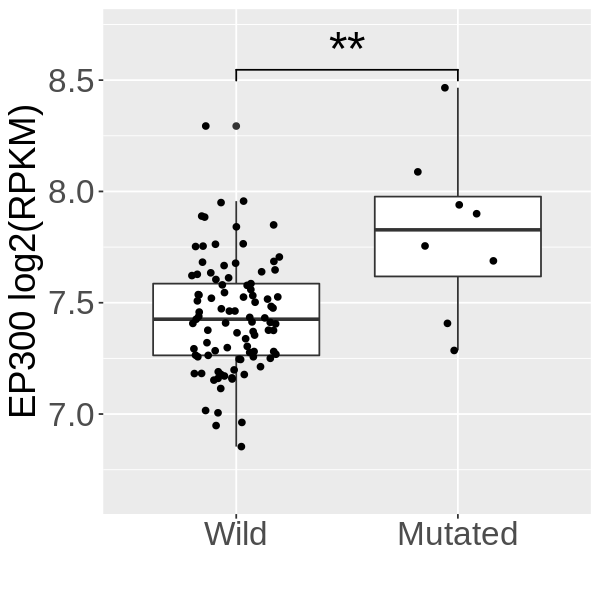

In [3]:
library(ggsignif)
options(repr.plot.width=5,repr.plot.height=5)
ggplot(EP300,aes(x=Status,y=ENSG00000100393))+
geom_boxplot()+geom_jitter(width=0.2)+
geom_signif(comparisons = list(c("Mutated","Wild")),textsize = 10,vjust = 0.0,map_signif_level = TRUE)+
labs(x="",y="EP300 log2(RPKM)")+ylim(min(EP300$ENSG00000100393)-0.2,max(EP300$ENSG00000100393)+0.25)+
theme(axis.text=element_text(size=20),
     axis.title=element_text(size=22))
pdf("EP300_mutation_express_boxplot.pdf",height=4,width=4)
ggplot(EP300,aes(x=Status,y=ENSG00000100393))+
geom_boxplot()+geom_jitter(width=0.2)+
geom_signif(comparisons = list(c("Mutated","Wild")),textsize = 10,vjust = 0.5,map_signif_level = TRUE)+
labs(x="",y="EP300 log2(RPKM)")+ylim(min(EP300$ENSG00000100393)-0.2,max(EP300$ENSG00000100393)+0.25)+
theme(axis.text=element_text(size=20),
     axis.title=element_text(size=22))
dev.off()

In [4]:
library(ggpubr)
library(RColorBrewer)


In [5]:
library(survival)
library(survminer)

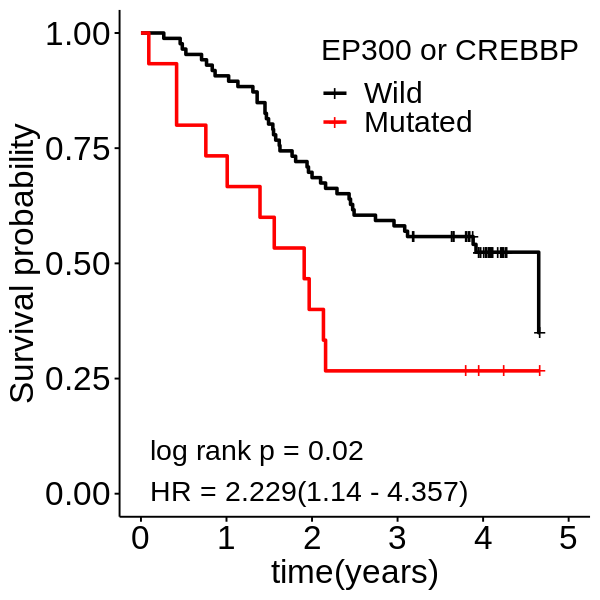

In [6]:

ggsurvplot(survfit(Surv(EP300_CREBBP$t.os,EP300_CREBBP$e.os)~Status1,EP300_CREBBP),EP300_CREBBP,palette = c("black","red"),
          pval="log rank p = 0.02\nHR = 2.229(1.14 - 4.357)",legend.title="EP300 or CREBBP",legend.labs=c("Wild","Mutated"),
            legend=c(0.7,0.85),pval.coord=c(0.1,0.05),
          xlab="time(years)",pval.size = 6,
          font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),)

png 
  2

png 
  2

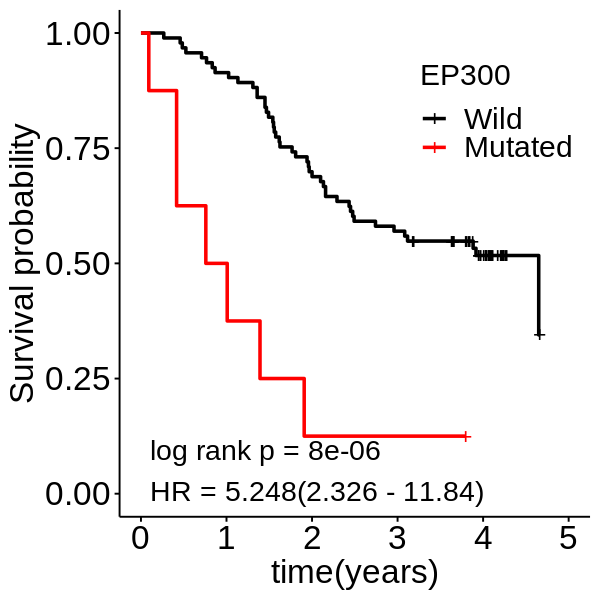

In [7]:
options(repr.plot.width=5,repr.plot.height=5)
ggsurvplot(survfit(Surv(EP300$t.os,EP300$e.os)~Status,EP300),EP300,palette = c("black","red"),
          pval="log rank p = 8e-06\nHR = 5.248(2.326 - 11.84)",legend.title="EP300",legend.labs=c("Wild","Mutated"),
            legend=c(0.8,0.8),pval.coord=c(0.1,0.05),
          xlab="time(years)",pval.size = 6,
          font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),)
pdf("EP300_mutation_survival.pdf",width=5,height=5,onefile=FALSE)
ggsurvplot(survfit(Surv(EP300$t.os,EP300$e.os)~Status,EP300),EP300,palette = c("black","red"),
          pval="log rank p = 8e-06\nHR = 5.248(2.326 - 11.84)",legend.title="EP300",legend.labs=c("Wild","Mutated"),
            legend=c(0.8,0.8),pval.coord=c(0.1,0.05),
          xlab="time(years)",pval.size = 6,
          font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),)
dev.off()
pdf("EP300_CREBBP_mutation_survival.pdf",width=5,height=5,onefile=FALSE)

ggsurvplot(survfit(Surv(EP300_CREBBP$t.os,EP300_CREBBP$e.os)~Status1,EP300_CREBBP),EP300_CREBBP,palette = c("black","red"),
          pval="log rank p = 0.02\nHR = 2.229(1.14 - 4.357)",legend.title="EP300 or CREBBP",legend.labs=c("Wild","Mutated"),
            legend=c(0.7,0.85),pval.coord=c(0.1,0.05),
          xlab="time(years)",pval.size = 6,
          font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),)
dev.off()

In [83]:
dat

allele,fraction,source,sample,count
<fct>,<dbl>,<fct>,<fct>,<dbl>
Reference,0.502,369_DNA,369,108
Reference,0.398,369_RNA,369,136
Reference,0.861,390_DNA,390,142
Reference,0.103,390_RNA,390,4
Reference,0.769,463_DNA,463,150
Reference,0.608,463_RNA,463,180
Alternative,0.498,369_DNA,369,107
Alternative,0.602,369_RNA,369,206
Alternative,0.139,390_DNA,390,23


In [84]:
library(gridExtra)
library(grid)

In [85]:
library(ggsignif)
library(ggpubr)
options(repr.plot.width=7,repr.plot.height=5)
p1=ggplot(subset(dat,sample=="369"),aes(x=source,y=fraction,fill=allele))+geom_bar(stat = "identity")+
    scale_fill_manual(values=rev(brewer.pal(3,"Set1")[1:2]))+
    labs(x="",y="Fraction")+ylim(-0.02,1.1)+
    geom_signif(
    comparisons = list(c("369_DNA", "369_RNA")),
    textsize = 6,annotations ="0.02",vjust=-0.15,y=1.03,tip_length = 0.2,linetype = "blank") +
    theme(legend.position = "none",axis.title = element_text(size=18),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))


p2=ggplot(subset(dat,sample=="390"),aes(x=source,y=fraction,fill=allele))+geom_bar(stat = "identity")+
    scale_fill_manual(values=rev(brewer.pal(3,"Set1")[1:2]))+
    labs(x="",y="")+ylim(-0.02,1.1)+
    geom_signif(
    comparisons = list(c("390_DNA", "390_RNA")),
    textsize = 6,annotations ="0.0001",vjust=-0.05,y=1.03,tip_length = 0.08,linetype = "blank") +
    theme(legend.position = "none",axis.title = element_text(size=18),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

p3=ggplot(subset(dat,sample=="463"),aes(x=source,y=fraction,fill=allele))+geom_bar(stat = "identity")+
scale_fill_manual(values=rev(brewer.pal(3,"Set1")[1:2]))+
labs(x="",y="")+ylim(-0.02,1.1)+
geom_signif(
    comparisons = list(c("463_DNA", "463_RNA")),
    textsize = 6,annotations ="0.0002",vjust=0,y=1.03,tip_length = 0,linetype = "blank"
 ) +
theme(legend.position = "none",axis.title = element_text(size=18),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

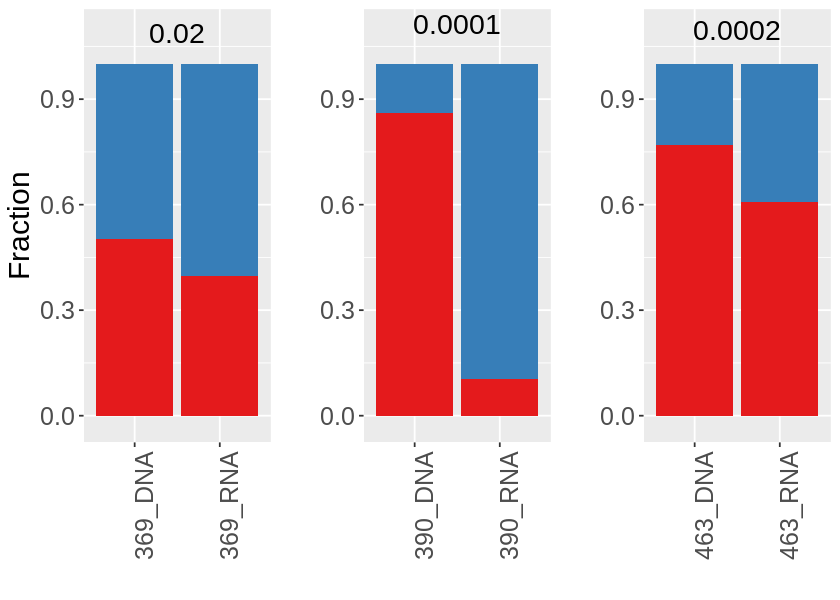

In [86]:
grid.arrange(p1,p2,p3,ncol=3)

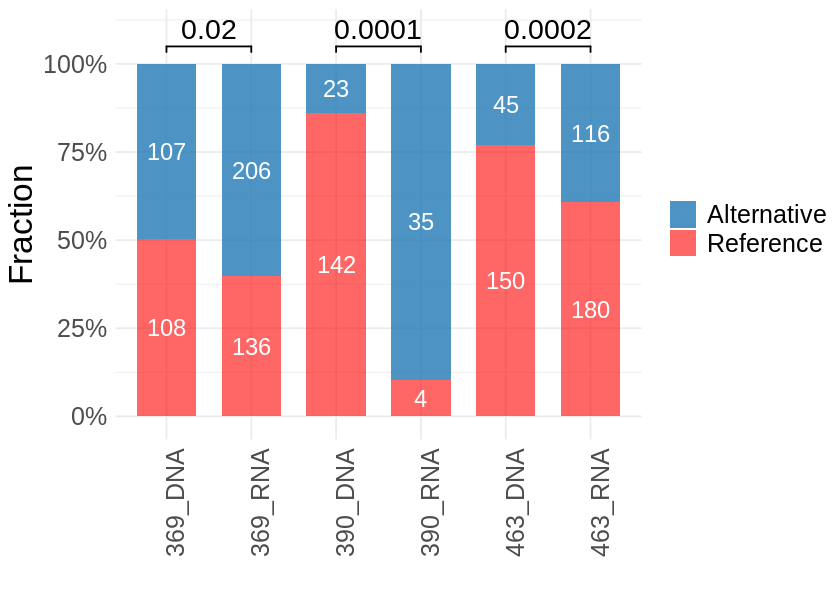

In [87]:
ggplot(dat,aes(x=source,y=fraction,fill=allele,width=0.70))+geom_bar(stat = "identity")+
    geom_text(aes(label=count,group=allele),
              color="white",position = position_fill(vjust=0.5),size=5)+
    scale_fill_manual(values=c('#1f77b4ca','#FF000098'))+
    scale_y_continuous(breaks =c(0,0.25,0.5,0.75,1), labels=c("0%","25%","50%","75%","100%"),limits =c(-0.01,1.1) )+
    labs(x="",y="Fraction")+
    geom_signif(
    comparisons = list(c("369_DNA", "369_RNA"),c("390_DNA", "390_RNA"),c("463_DNA", "463_RNA")),
    textsize = 6,annotations =c("0.02","0.0001","0.0002"),vjust=-0.15,y=1.01,tip_length = 0.02) +
    theme_minimal()+
    theme(legend.position = "right",legend.title=element_blank(),
          legend.text=element_text(size=15),
          axis.title = element_text(size=20),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

In [88]:
p1=ggplot(subset(dat,sample=="369"),aes(x=source,y=fraction,fill=allele,width=0.70))+geom_bar(stat = "identity")+
    geom_text(aes(label=count,group=allele),
              color="white",position = position_fill(vjust=0.5),size=5)+
    scale_fill_manual(values=c('#1f77b4ca','#FF000098'))+
    scale_y_continuous(breaks =c(0,0.25,0.5,0.75,1), labels=c("0%","25%","50%","75%","100%"),limits =c(-0.01,1.1) )+
    labs(x="",y="Fraction")+
    geom_signif(
    comparisons = list(c("369_DNA", "369_RNA")),
    textsize = 6.5,annotations ="*",vjust=-0.15,y=1.025,tip_length = 0.05) +
    theme(legend.position = "none",axis.title = element_text(size=20),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

In [89]:
p2=ggplot(subset(dat,sample=="390"),aes(x=source,y=fraction,fill=allele,width=0.70))+geom_bar(stat = "identity")+
    geom_text(aes(label=count,group=allele),
              color="white",position = position_fill(vjust=0.5),size=5)+
    scale_fill_manual(values=c('#1f77b4ca','#FF000098'))+
     scale_y_continuous(breaks =c(0,0.25,0.5,0.75,1), labels=c("0%","25%","50%","75%","100%"),limits =c(-0.01,1.1) )+
    labs(x="",y="Fraction")+
    geom_signif(
    comparisons = list(c("390_DNA", "390_RNA")),
    textsize = 6.5,annotations ="***",vjust=-0.15,y=1.01,tip_length = 0.02) +
    theme(legend.position = "none",axis.title = element_text(size=20),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

In [90]:
p3=ggplot(subset(dat,sample=="463"),aes(x=source,y=fraction,fill=allele,width=0.70))+geom_bar(stat = "identity")+
    geom_text(aes(label=count,group=allele),
              color="white",position = position_fill(vjust=0.5),size=5)+
    scale_fill_manual(values=c('#1f77b4ca','#FF000098'))+
    scale_y_continuous(breaks =c(0,0.25,0.5,0.75,1), labels=c("0%","25%","50%","75%","100%"),limits =c(-0.01,1.1))+
    labs(x="",y="Fraction")+
    geom_signif(
    comparisons = list(c("463_DNA", "463_RNA")),
    textsize = 6.5,annotations ="***",vjust=-0.15,y=1.01,tip_length = 0.02) +
    theme(legend.title = element_blank(),
          legend.position="right",
          legend.text = element_text(size=15),
          axis.title = element_text(size=20),
          axis.text = element_text(size=15),
          axis.text.x = element_text(angle=90))

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


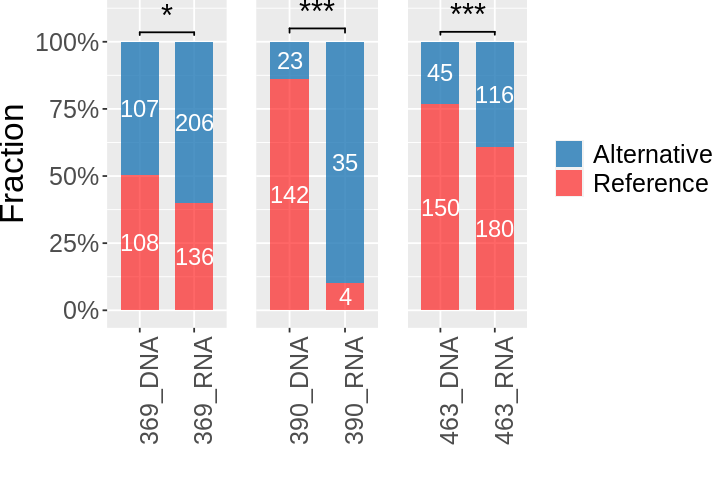

In [91]:
options(repr.plot.width=6,repr.plot.height=4)
cowplot::plot_grid(p1+theme(plot.margin = margin(0, 0, 0, 0)), 
                   p2 + 
                        theme(axis.text.y = element_blank(),
                              axis.ticks.y = element_blank(),
                              axis.title.y = element_blank(),plot.margin = margin(0, 15, 0,15)), 
                   p3 + 
                        theme(axis.text.y = element_blank(),
                              axis.ticks.y = element_blank(),
                              axis.title.y = element_blank(),
                               plot.margin = margin(0, 0, 0, 0),
                               legend.position="right"),
                   nrow = 1,
                    rel_widths = c(3.15,2.45,4.4),
                   labels = "",
                   align = "v")

In [92]:
savedat

allele,fraction,source,sample,count
<fct>,<dbl>,<fct>,<fct>,<dbl>
Reference,0.502,369_DNA,369,108
Reference,0.398,369_RNA,369,136
Reference,0.861,390_DNA,390,142
Reference,0.103,390_RNA,390,4
Reference,0.769,463_DNA,463,150
Reference,0.608,463_RNA,463,180
Alternative,0.498,369_DNA,369,107
Alternative,0.602,369_RNA,369,206
Alternative,0.139,390_DNA,390,23
